# Wrangle
We were given a .csv file containing cohorts data. Will read that into a dataframe to explore.

In [1]:
#Disable warnings
import warnings
warnings.filterwarnings('ignore')

#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scaler import
from sklearn.preprocessing import MinMaxScaler

# DBSCAN import
from sklearn.cluster import DBSCAN

#Import custom libraries
import wrangle as w 
import prepare as p

Project - Anomaly Detection
*This post is created as a place to return feedback and grades. If you sent your email, you are good to go!*


Email to analyst:


Hello,


I have some questions for you that I need to be answered before the board meeting Thursday afternoon. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.


1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [2]:
df = w.get_curriculum_data()


Getting data from database...
Saving to .csv files...
Returned dataframes.


In [3]:
df.head()


,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,full_stack_php
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,full_stack_php
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,full_stack_php
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,full_stack_php
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,full_stack_java


In [4]:
df.shape

(900223, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          900223 non-null  object 
 1   time          900223 non-null  object 
 2   path          900222 non-null  object 
 3   user_id       900223 non-null  int64  
 4   cohort_id     847330 non-null  float64
 5   ip            900223 non-null  object 
 6   id            847330 non-null  float64
 7   name          847330 non-null  object 
 8   slack         847330 non-null  object 
 9   start_date    847330 non-null  object 
 10  end_date      847330 non-null  object 
 11  created_at    847330 non-null  object 
 12  updated_at    847330 non-null  object 
 13  deleted_at    0 non-null       object 
 14  program_id    847330 non-null  float64
 15  program_name  900223 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 109.9+ MB


- Our dataframe returns the data from the curriculum logs for all cohorts at Code Up.

# Prepare

In [6]:
df = p.prepare_data(df)

In [7]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,timestamp
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,full_stack_php,2018-01-26 09:55:03
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,full_stack_php,2018-01-26 09:56:02
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,full_stack_php,2018-01-26 09:56:05
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,full_stack_php,2018-01-26 09:56:06
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,full_stack_java,2018-01-26 09:56:24


In [8]:
df.program_name.value_counts()



full_stack_java    713365
data_science       103412
unknown_program     52893
full_stack_php      30548
front_end               5
Name: program_name, dtype: int64

In [9]:
p.nulls_by_col(df)


,num_rows_missing,percent_rows_missing
date,0,0.000000
time,0,0.000000
path,1,0.000111
user_id,0,0.000000
cohort_id,52893,5.875544
ip,0,0.000000
id,52893,5.875544
name,52893,5.875544
slack,52893,5.875544
start_date,52893,5.875544


In [10]:
p.nulls_by_row(df)


,num_cols_missing,percent_cols_missing,index
0,1,5.88235294117647,847329
1,2,11.76470588235294,1
2,10,58.82352941176471,52893


In [11]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,timestamp
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,full_stack_php,2018-01-26 09:55:03
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,full_stack_php,2018-01-26 09:56:02
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,full_stack_php,2018-01-26 09:56:05
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,full_stack_php,2018-01-26 09:56:06
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,full_stack_java,2018-01-26 09:56:24


In [12]:
df.isna().sum()

date                 0
time                 0
path                 1
user_id              0
cohort_id        52893
ip                   0
id               52893
name             52893
slack            52893
start_date       52893
end_date         52893
created_at       52893
updated_at       52893
deleted_at      900223
program_id       52893
program_name         0
timestamp            0
dtype: int64

In [13]:
df[df.name.isna() & df.program_id.isna()]


,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,timestamp
411,2018-01-26,16:46:16,/,48,NaN,97.105.19.61,NaN,None,None,None,None,None,None,None,NaN,unknown_program,2018-01-26 16:46:16
412,2018-01-26,16:46:24,spring/extra-features/form-validation,48,NaN,97.105.19.61,NaN,None,None,None,None,None,None,None,NaN,unknown_program,2018-01-26 16:46:24
425,2018-01-26,17:54:24,/,48,NaN,97.105.19.61,NaN,None,None,None,None,None,None,None,NaN,unknown_program,2018-01-26 17:54:24
435,2018-01-26,18:32:03,/,48,NaN,97.105.19.61,NaN,None,None,None,None,None,None,None,NaN,unknown_program,2018-01-26 18:32:03
436,2018-01-26,18:32:17,mysql/relationships/joins,48,NaN,97.105.19.61,NaN,None,None,None,None,None,None,None,NaN,unknown_program,2018-01-26 18:32:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899897,2021-04-21,12:49:00,javascript-ii,717,NaN,136.50.102.126,NaN,None,None,None,None,None,None,None,NaN,unknown_program,2021-04-21 12:49:00
899898,2021-04-21,12:49:02,javascript-ii/es6,717,NaN,136.50.102.126,NaN,None,None,None,None,None,None,None,NaN,unknown_program,2021-04-21 12:49:02
899899,2021-04-21,12:51:27,javascript-ii/map-filter-reduce,717,NaN,136.50.102.126,NaN,None,None,None,None,None,None,None,NaN,unknown_program,2021-04-21 12:51:27
899900,2021-04-21,12:52:37,javascript-ii/promises,717,NaN,136.50.102.126,NaN,None,None,None,None,None,None,None,NaN,unknown_program,2021-04-21 12:52:37


Deciding to drop nulls since they do not have a cohort associated to them and eliminates much of the earlier data during curriculum and cohort establishment making for a cleaner data frame. 
- Will look into nulls later. 
- Will add code to drop nulls in prepare.py.

In [14]:
df.head().T

,0,1,2,3,4
date,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26
time,09:55:03,09:56:02,09:56:05,09:56:06,09:56:24
path,/,java-ii,java-ii/object-oriented-programming,slides/object_oriented_programming,javascript-i/conditionals
user_id,1,1,1,1,2
cohort_id,8.0,8.0,8.0,8.0,22.0
ip,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61
id,8.0,8.0,8.0,8.0,22.0
name,Hampton,Hampton,Hampton,Hampton,Teddy
slack,#hampton,#hampton,#hampton,#hampton,#teddy
start_date,2015-09-22,2015-09-22,2015-09-22,2015-09-22,2018-01-08


In [15]:
#Checking to see that nulls were dropped
df.isna().sum()

date                 0
time                 0
path                 1
user_id              0
cohort_id        52893
ip                   0
id               52893
name             52893
slack            52893
start_date       52893
end_date         52893
created_at       52893
updated_at       52893
deleted_at      900223
program_id       52893
program_name         0
timestamp            0
dtype: int64

- Removed all Nulls

In [16]:
#Look at prepped dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          900223 non-null  object        
 1   time          900223 non-null  object        
 2   path          900222 non-null  object        
 3   user_id       900223 non-null  int64         
 4   cohort_id     847330 non-null  float64       
 5   ip            900223 non-null  object        
 6   id            847330 non-null  float64       
 7   name          847330 non-null  object        
 8   slack         847330 non-null  object        
 9   start_date    847330 non-null  object        
 10  end_date      847330 non-null  object        
 11  created_at    847330 non-null  object        
 12  updated_at    847330 non-null  object        
 13  deleted_at    0 non-null       object        
 14  program_id    847330 non-null  float64       
 15  program_name  900

In [17]:
df.columns


Index(['date', 'time', 'path', 'user_id', 'cohort_id', 'ip', 'id', 'name',
       'slack', 'start_date', 'end_date', 'created_at', 'updated_at',
       'deleted_at', 'program_id', 'program_name', 'timestamp'],
      dtype='object')

In [18]:
#Look at the different counts per each program ID
df.program_id.value_counts()

2.0    713365
3.0    103412
1.0     30548
4.0         5
Name: program_id, dtype: int64

In [19]:
#Look at the distribution of web logs by program type
df.program_name.value_counts()


full_stack_java    713365
data_science       103412
unknown_program     52893
full_stack_php      30548
front_end               5
Name: program_name, dtype: int64

In [20]:
df.path.value_counts()

/                                                               50313
search/search_index.json                                        19519
javascript-i                                                    18983
toc                                                             18297
java-iii                                                        13733
                                                                ...  
javascript/loops                                                    1
content/control-structures-ii                                       1
javascript-ii/promisesdfghjkjhgfs                                   1
app                                                                 1
appendix/professional-development/post-interview-review-form        1
Name: path, Length: 2313, dtype: int64

- Created a new column with description of program type for easier readability
- We have 52,893 nulls, and dropped them in our prepare.py
- Dropped 'deleted_at' column because no entries have a value, all are null, which means no web logs have been deleted
- Removed log entries for paths ending in image or json files

# Explore


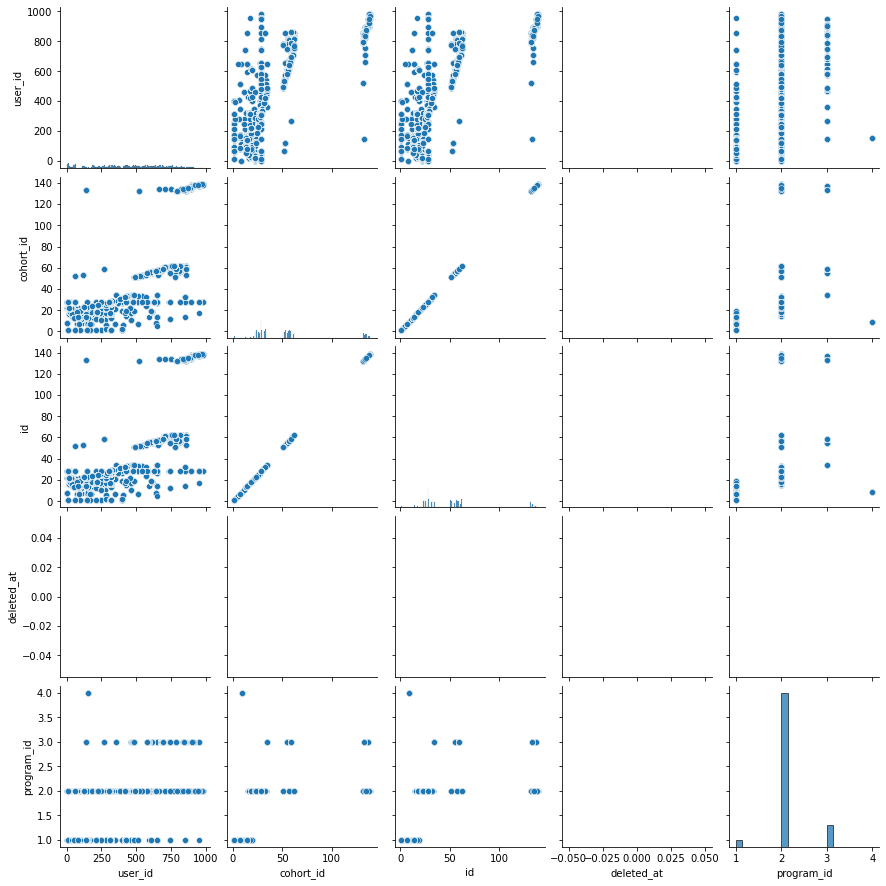

In [21]:
#Create a pair plot to see visual relationships between numeric variables
sns.pairplot(df)

In [22]:
#Combine date and time columns into one date-time column to use for indexing
#df = df.set_index(pd.to_datetime(df.date + ' ' + df.time))

<AxesSubplot:title={'center':'Which hours were the most active?'}>

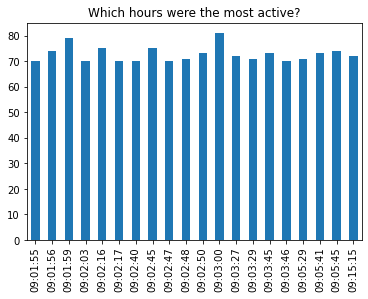

In [23]:
df.time.value_counts().head(20).sort_index().plot.bar(title='Which hours were the most active?')


<AxesSubplot:title={'center':'Which date/times were the most active?'}>

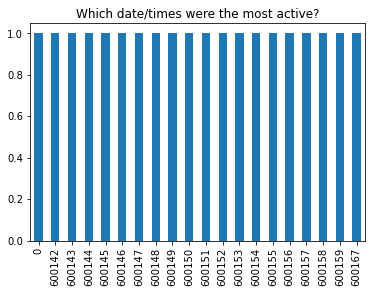

In [24]:
df.index.value_counts().head(20).sort_index().plot.bar(title='Which date/times were the most active?')


In [25]:
df.head().T

,0,1,2,3,4
date,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26
time,09:55:03,09:56:02,09:56:05,09:56:06,09:56:24
path,/,java-ii,java-ii/object-oriented-programming,slides/object_oriented_programming,javascript-i/conditionals
user_id,1,1,1,1,2
cohort_id,8.0,8.0,8.0,8.0,22.0
ip,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61
id,8.0,8.0,8.0,8.0,22.0
name,Hampton,Hampton,Hampton,Hampton,Teddy
slack,#hampton,#hampton,#hampton,#hampton,#teddy
start_date,2015-09-22,2015-09-22,2015-09-22,2015-09-22,2018-01-08


<AxesSubplot:title={'center':'Which program types are the most popular?'}>

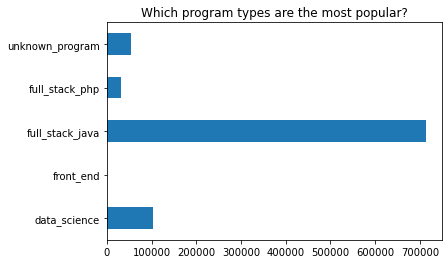

In [26]:
df.program_name.value_counts().sort_index().plot.barh(title="Which program types are the most popular?")


<AxesSubplot:title={'center':'Which cohorts are the most active online?'}>

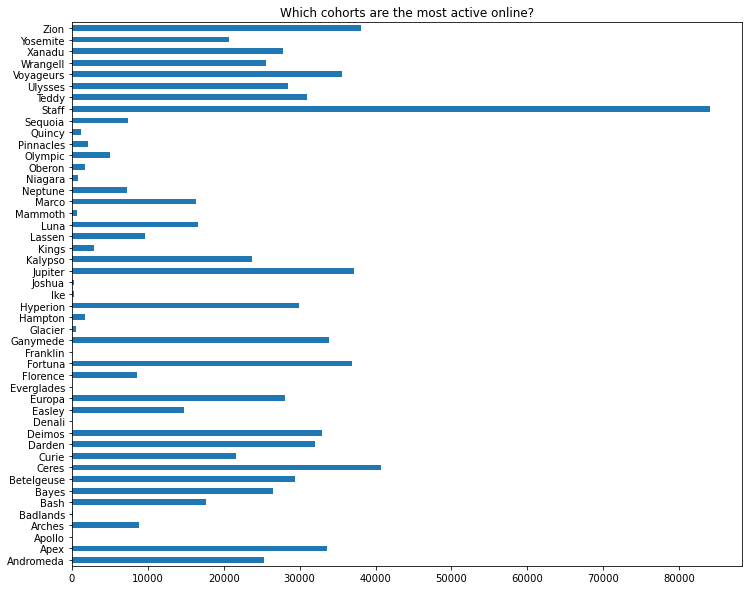

In [27]:
fig, ax = plt.subplots(figsize=(12,10))
df.name.value_counts().sort_index().plot.barh(title="Which cohorts are the most active online?")

- After Code Up staff, Ceres was the most frequest accessor of the curriculum.


In [28]:
# Daily counts for number of page views
df.date = pd.to_datetime(df.date)
df = df.set_index(df.date)

pages = df['path'].resample('d').count()
pages.head()

date
2018-01-26    572
2018-01-27    230
2018-01-28    170
2018-01-29    830
2018-01-30    652
Freq: D, Name: path, dtype: int64

<AxesSubplot:xlabel='date'>

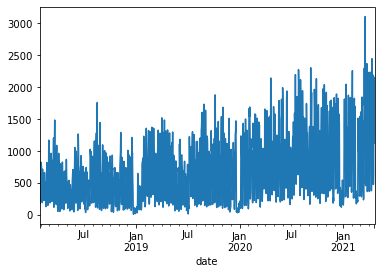

In [29]:
#plot pages
pages.plot()

## Questions:

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?</code>

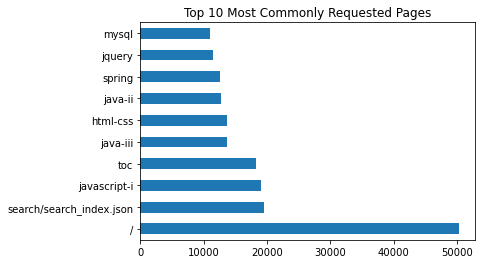

In [30]:
df.path.value_counts().head(10).plot.barh(
    title='Top 10 Most Commonly Requested Pages');

In [31]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [32]:
#Look at the top lessons accessed
path_df = value_counts_and_frequencies(df.path)
path_df.head(10)

,count,proba
/,50313,0.055889
search/search_index.json,19519,0.021682
javascript-i,18983,0.021087
toc,18297,0.020325
java-iii,13733,0.015255
html-css,13635,0.015146
java-ii,12685,0.014091
spring,12524,0.013912
jquery,11525,0.012802
mysql,11033,0.012256


In [33]:
#Look at the 20 lessons least accessed
path_df.tail(20)


,count,proba
appendix/java/intellij-tomcat-configuration,1,0.000001
7.4.2-series,1,0.000001
content/mysql/relationships/indexes.html,1,0.000001
users/167,1,0.000001
npm,1,0.000001
web-design/ux/layout/.json,1,0.000001
appendix/cls/2-listing-files,1,0.000001
appendix/cli/2-Overview,1,0.000001
appendix/cli/2-overview,1,0.000001
cli/4-navigating-the-filesystem,1,0.000001


<span class="mark">- The javascript-i lesson looks to be the most commonly requested page</span>


2. Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over?

- Will group by program type to compare cohorts and then look at the max lessons viewed and how they compared to other cohorts.
- Will also group paths by module splitting the lessons at the first '/' to categorize into modules instead of individual lessons.

In [34]:
#Let's take a look at user lesson counts
lesson_counts_by_cohort = df.groupby(['name'])['date','name','path'].nunique()
lesson_counts_by_cohort


,date,name,path
name,,,
Andromeda,447,1,366
Apex,386,1,273
Apollo,1,1,4
Arches,278,1,342
Badlands,12,1,44
Bash,252,1,275
Bayes,512,1,533
Betelgeuse,430,1,334
Ceres,466,1,301


In [35]:
#Let's take a look at user lesson counts by path
lesson_counts_by_path = df.groupby(['path'])['date','name'].nunique()
lesson_counts_by_path.max()

date    1182
name      47
dtype: int64

In [36]:
#Create an initial lesson category to group paths by
df['module_1'] = df.path.str.split('/').str[0]
df['module_2'] = df.path.str.split('/').str[1]
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,timestamp,module_1,module_2
date,,,,,,,,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,full_stack_php,2018-01-26 09:55:03,,
2018-01-26,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,full_stack_php,2018-01-26 09:56:02,java-ii,NaN
2018-01-26,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,full_stack_php,2018-01-26 09:56:05,java-ii,object-oriented-programming
2018-01-26,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,full_stack_php,2018-01-26 09:56:06,slides,object_oriented_programming
2018-01-26,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,full_stack_java,2018-01-26 09:56:24,javascript-i,conditionals


In [37]:
# Let's create a subset of data science students to compare lessons by cohort
ds_cohorts = df[(df['program_name'] == 'data_science')  & (df['name'] != 'staff')]
ds_cohorts

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,timestamp,module_1,module_2
date,,,,,,,,,,,,,,,,,,,
2019-08-20,2019-08-20,09:39:58,/,466,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,data_science,2019-08-20 09:39:58,,
2019-08-20,2019-08-20,09:39:59,/,467,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,data_science,2019-08-20 09:39:59,,
2019-08-20,2019-08-20,09:39:59,/,468,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,data_science,2019-08-20 09:39:59,,
2019-08-20,2019-08-20,09:40:02,/,469,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,data_science,2019-08-20 09:40:02,,
2019-08-20,2019-08-20,09:40:08,/,470,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,data_science,2019-08-20 09:40:08,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,2021-04-21,16:14:16,regression/project,841,133.0,99.162.244.233,133.0,Easley,#easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,None,3.0,data_science,2021-04-21 16:14:16,regression,project
2021-04-21,2021-04-21,16:15:51,regression/project,841,133.0,99.162.244.233,133.0,Easley,#easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,None,3.0,data_science,2021-04-21 16:15:51,regression,project
2021-04-21,2021-04-21,16:23:53,/,143,133.0,173.174.194.60,133.0,Easley,#easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,None,3.0,data_science,2021-04-21 16:23:53,,


In [38]:
ds_lesson_counts_by_path = ds_cohorts.groupby(['name'])['module_1','path'].nunique()
ds_lesson_counts_by_path

,module_1,path
name,,
Bayes,86,533
Curie,55,418
Darden,74,420
Easley,38,230
Florence,42,162


<AxesSubplot:ylabel='name'>

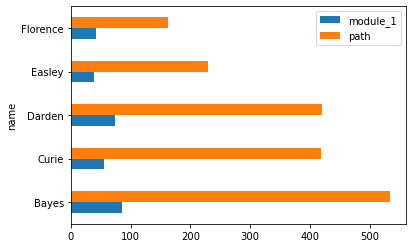

In [39]:
ds_lesson_counts_by_path.plot.barh()

- It looks like Bayes had the most frequent access to the curriculum of all data science cohorts


In [40]:
ds_cohorts.module_1.value_counts()


fundamentals              8746
classification            8620
                          8358
1-fundamentals            7945
sql                       7505
                          ... 
misleading3_deaths.jpg       1
.gitignore                   1
Index.html                   1
index.html                   1
7.4.1-pandas-overview        1
Name: module_1, Length: 153, dtype: int64

- It looks like the SQL and classification modules are the most popular among all data science cohorts


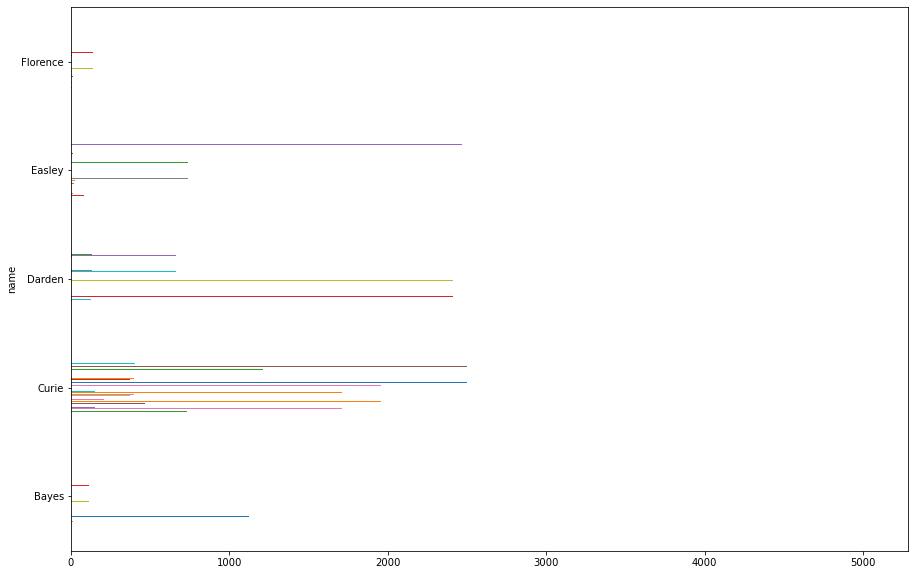

In [41]:
# plot data
fig, ax = plt.subplots(figsize=(15,10))
# use unstack()
ds_cohorts.groupby(['name','module_1']).count().unstack().head(10).plot.barh(ax=ax)
ax.legend().set_visible(False)

In [42]:
ds = ds_cohorts.groupby(['name','module_1']).count().unstack()
ds

date                                                            \
module_1         %20https: ,%20https: .gitignore 1-fundamentals 1-overview   
name                                                                         
Bayes     1967.0       NaN        NaN        NaN         3124.0        2.0   
Curie     1712.0       1.0        1.0        NaN         2148.0        NaN   
Darden    2980.0       NaN        NaN        1.0         2411.0        NaN   
Easley    1115.0       NaN        NaN        NaN           76.0        NaN   
Florence   584.0       NaN        NaN        NaN          186.0        NaN   

                                                                           \
module_1 1.2-data-science-pipeline 1.3-pipeline-demo 10-anomaly-detection   
name                                                                        
Bayes                          NaN               NaN               1200.0   
Curie                          NaN               NaN                928.0   
Darden                         5.0               4.0                 57.0   
Easley                         NaN               NaN                  NaN   
Florence                       NaN               NaN                  NaN   

                  ...   module_2                                       \
module_1  11-nlp  ... subqueries tidy-data timeseries  toc understand   
name              ...                                                   
Bayes     1118.0  ...        NaN       0.0       78.0  0.0        NaN   
Curie      735.0  ...        NaN       NaN      133.0  NaN        NaN   
Darden      12.0  ...        NaN       NaN      938.0  0.0        NaN   
Easley       NaN  ...        NaN       NaN      435.0  NaN        0.0   
Florence     NaN  ...        0.0       NaN        6.0  NaN        NaN   

                                                            \
module_1 user-defined-functions.md viz.py vocabulary where   
name                                                         
Bayes                          NaN    0.0        NaN   NaN   
Curie                          NaN    NaN        NaN   NaN   
Darden                         NaN    NaN        NaN   NaN   
Easley                         0.0    NaN        0.0   NaN   
Florence                       NaN    NaN        0.0   0.0   

                                        
module_1 working-with-time-series-data  
name                                    
Bayes                              NaN  
Curie                              NaN  
Darden                             0.0  
Easley                             NaN  
Florence                           NaN  

[5 rows x 2601 columns]

- It looks like Darden is accessing a module more than the other cohorts. Let's take a closer look at each cohort..


In [43]:
ds_bayes = ds_cohorts[ds_cohorts['name']== 'Bayes']

dsb = ds_bayes.module_1.value_counts()


Text(0.5, 1.0, 'Most Frequently Accessed Lessons for Bayes')

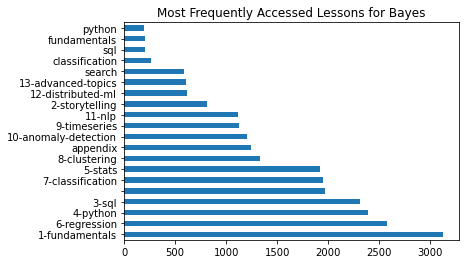

In [44]:
dsb.head(20).plot.barh()
plt.title ("Most Frequently Accessed Lessons for Bayes")


In [45]:
ds_curie = ds_cohorts[ds_cohorts['name']== 'Curie']

dsc = ds_curie.module_1.value_counts()
dsc

3-sql                                    2499
4-python                                 2330
1-fundamentals                           2148
6-regression                             1957
                                         1712
5-stats                                  1226
7-classification                         1213
appendix                                 1161
10-anomaly-detection                      928
8-clustering                              746
11-nlp                                    735
2-storytelling                            683
9-timeseries                              591
search                                    539
fundamentals                              467
13-advanced-topics                        404
classification                            401
sql                                       380
12-distributed-ml                         375
python                                    212
nlp                                       161
anomaly-detection                 

Text(0.5, 1.0, 'Most Frequently Accessed Lessons for Curie')

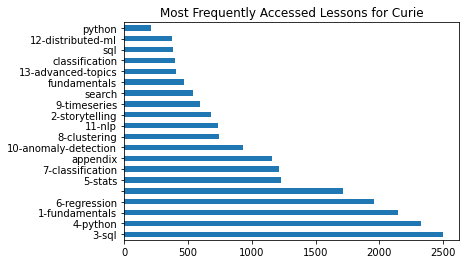

In [46]:
dsc.head(20).plot.barh()
plt.title ("Most Frequently Accessed Lessons for Curie")

In [47]:
ds_darden = ds_cohorts[ds_cohorts['name']== 'Darden']

dsd = ds_darden.module_1.value_counts()
dsd

classification                  5030
                                2980
sql                             2771
python                          2572
1-fundamentals                  2411
                                ... 
AnomalyDetectionCartoon.jpeg       1
bad-charts                         1
12-distributed-ml                  1
.gitignore                         1
individual-project                 1
Name: module_1, Length: 74, dtype: int64

Text(0.5, 1.0, 'Most Frequently Accessed Lessons for Darden')

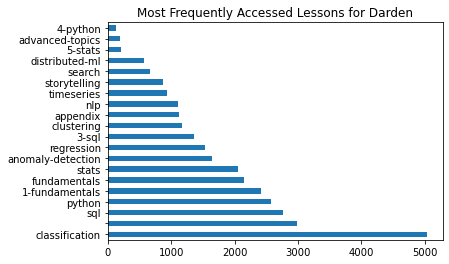

In [48]:
dsd.head(20).plot.barh()
plt.title ("Most Frequently Accessed Lessons for Darden")

In [49]:
ds_easley = ds_cohorts[ds_cohorts['name']== 'Easley']

dse = ds_easley.module_1.value_counts()
dse

classification               2715
fundamentals                 2469
sql                          1871
python                       1275
regression                   1140
                             1115
stats                        1008
clustering                    856
storytelling                  741
timeseries                    435
appendix                      282
anomaly-detection             255
search                        251
individual-project             80
1-fundamentals                 76
nlp                            34
advanced-topics                26
capstones                      22
AI-ML-DL-timeline.jpg          11
modern-data-scientist.jpg      11
distributed-ml                  8
environment-setup               8
6-regression                    4
series                          3
user-defined-functions.md       3
2-storytelling                  3
pandas-overview                 2
vocabulary                      1
7-classification                1
evaluate      

Text(0.5, 1.0, 'Most Frequently Accessed Lessons for Easley')

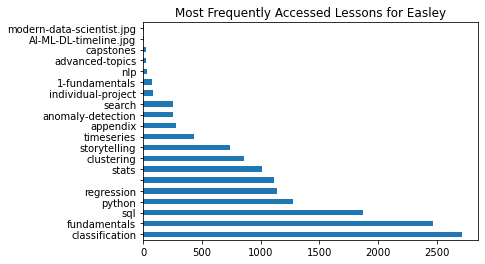

In [50]:
dse.head(20).plot.barh()
plt.title ("Most Frequently Accessed Lessons for Easley")

In [51]:
ds_florence = ds_cohorts[ds_cohorts['name']== 'Florence']

dsf = ds_florence.module_1.value_counts()
dsf 

fundamentals                                 3451
sql                                          2277
python                                       1349
                                              584
classification                                214
1-fundamentals                                186
search                                        162
appendix                                      140
anomaly-detection                              37
florence-python-assessment.html                16
storytelling                                   16
modern-data-scientist.jpg                      16
AI-ML-DL-timeline.jpg                          16
regression                                     15
dataframes                                     11
clustering                                     10
git                                             8
cli                                             7
timeseries                                      6
stats                                           5


Text(0.5, 1.0, 'Most Frequently Accessed Lessons for Florence')

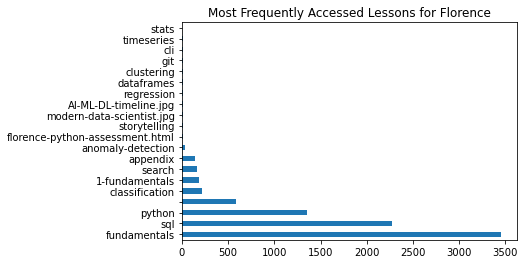

In [52]:
dsf.head(20).plot.barh()
plt.title ("Most Frequently Accessed Lessons for Florence")

<span class="mark">- The Classification module in the curriculum was accessed significantly more by Darden compared to the other cohorts.</span>

In [53]:
df.head().T

date,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26
date,2018-01-26 00:00:00,2018-01-26 00:00:00,2018-01-26 00:00:00,2018-01-26 00:00:00,2018-01-26 00:00:00
time,09:55:03,09:56:02,09:56:05,09:56:06,09:56:24
path,/,java-ii,java-ii/object-oriented-programming,slides/object_oriented_programming,javascript-i/conditionals
user_id,1,1,1,1,2
cohort_id,8.0,8.0,8.0,8.0,22.0
ip,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61
id,8.0,8.0,8.0,8.0,22.0
name,Hampton,Hampton,Hampton,Hampton,Teddy
slack,#hampton,#hampton,#hampton,#hampton,#teddy
start_date,2015-09-22,2015-09-22,2015-09-22,2015-09-22,2018-01-08


<AxesSubplot:xlabel='cohort_id', ylabel='program_id'>

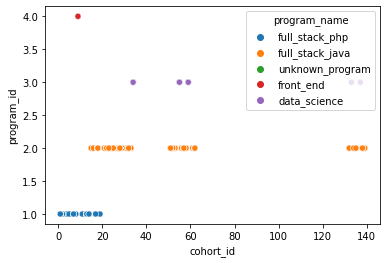

In [54]:

sns.scatterplot(data=df, x='cohort_id', y="program_id", hue="program_name")

In [55]:
df.program_id.value_counts()

2.0    713365
3.0    103412
1.0     30548
4.0         5
Name: program_id, dtype: int64

In [56]:
summary = p.summarize(df)



Dataframe head: 
| date                | date                | time     | path                                |   user_id |   cohort_id | ip           |   id | name    | slack    | start_date   | end_date   | created_at          | updated_at          | deleted_at   |   program_id | program_name   | timestamp           | module_1   | module_2                    |
|:--------------------|:--------------------|:---------|:------------------------------------|----------:|------------:|:-------------|-----:|:--------|:---------|:-------------|:-----------|:--------------------|:--------------------|:-------------|-------------:|:---------------|:--------------------|:-----------|:----------------------------|
| 2018-01-26 00:00:00 | 2018-01-26 00:00:00 | 09:55:03 | /                                   |         1 |           8 | 97.105.19.61 |    8 | Hampton | #hampton | 2015-09-22   | 2016-02-06 | 2016-06-14 19:52:26 | 2016-06-14 19:52:26 |              |            1 | full_stack_php | 20

Name: created_at, dtype: int64
2018-12-06 17:04:19    84031
2019-07-15 16:57:21    40730
2019-01-20 23:18:57    38096
2020-09-21 18:06:27    37109
2020-01-13 21:17:08    36902
2018-05-25 22:25:57    35636
2020-03-23 17:52:16    33844
2020-07-29 18:41:13    33568
2019-09-16 13:07:04    32888
2020-07-13 18:32:19    32015
2018-01-08 13:59:10    30926
2020-05-26 19:22:44    29855
2019-05-28 18:41:05    29356
2018-03-05 14:22:11    28534
2019-11-04 18:27:07    28033
2018-09-17 19:09:51    27749
2019-08-20 14:38:55    26538
2018-07-23 15:02:25    25586
2019-03-18 20:35:06    25359
2020-11-02 20:43:58    23691
2020-02-03 19:31:51    21582
2018-11-05 15:26:37    20743
2020-09-30 15:54:46    17713
2020-12-07 16:58:43    16623
2021-01-20 21:31:11    16397
2016-06-14 19:52:26    14775
2020-12-07 15:20:18    14715
2016-07-18 19:06:27     9587
2021-03-15 18:18:20     8562
2017-09-27 20:22:41     7444
2021-03-15 19:57:09     7276
2017-02-06 17:49:10     4954
2017-03-28 00:33:12     2158
2021-04-12 1